In [1]:
!pip install tf-keras-vis

     |████████████████████████████████| 53 kB 1.9 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

from tensorflow.keras import models
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D

Tensorflow recognized 1 GPUs


In [4]:
model = models.load_model('/content/drive/MyDrive/Le Wagon - Projet/Models/Custom/20210831-232206-images_41312-batch_32-vgg_like')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 222, 222, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 220, 220, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)     

# Visualizing output category


In [30]:
# Classes
selected_classes = ['abstract', 'color_field_painting', 'cubism', 'expressionism', 'impressionism','realism', 'renaissance', 'romanticism']

# Params
steps = 2048
regularizers=[TotalVariation2D(weight=0.001),Norm(weight=0.01, p=2)]
input_modifiers = [Jitter(jitter=32)]

# regularizers=[TotalVariation2D(weight=0.01),Norm(weight=0.02, p=2)], input_modifiers = [Jitter(jitter=32)] # Best
# regularizers=[TotalVariation2D(weight=0.05),Norm(weight=0.08, p=2)], input_modifiers = [Jitter(jitter=32)] # VERY GOOD
# regularizers=[TotalVariation2D(weight=0.1),Norm(weight=0.08, p=2)], input_modifiers = [Jitter(jitter=32)] # VERY GOOD
# regularizers=[TotalVariation2D(weight=0.1),Norm(weight=0.1, p=1)], input_modifiers = [Jitter(jitter=32)] # GOOD
# regularizers=[TotalVariation2D(weight=0.1),Norm(weight=0.3, p=1)], input_modifiers = [Jitter(jitter=32)] # GOOD
# regularizers=[TotalVariation2D(weight=1.0),Norm(weight=0.3, p=1)], input_modifiers = [Jitter(jitter=32)] # GOOD

In [31]:
CLASS_NAMES = ['abstract', 'color_field_painting', 'cubism', 'expressionism', 'impressionism','realism', 'renaissance', 'romanticism']
ind = [np.argmax(np.array(CLASS_NAMES) == i) for i in selected_classes]
score = CategoricalScore(ind)

replace2linear = ReplaceToLinear()
activation_maximization = ActivationMaximization(model, model_modifier=replace2linear, clone=True)

seed_input = tf.random.uniform((len(ind), 224, 224, 3), 0, 255)

# Generate maximized activation
activations = activation_maximization(score,
                                      seed_input = seed_input,
                                      callbacks=[Progress()],steps=steps,training=False,
                                      regularizers = regularizers,
                                      input_modifiers = input_modifiers)


2048/2048 [==============================] - 334s 163ms/step - Score: 247.4310 - TotalVariation2D: 0.1515 - Norm: 2.1111


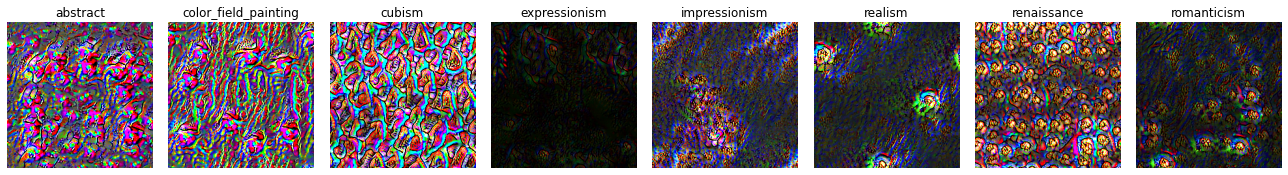

In [32]:
# Render
f, ax = plt.subplots(nrows=1, ncols=len(ind), figsize=(18, 10))
for i, title in enumerate(np.array(CLASS_NAMES)[ind]):
    ax[i].set_title(title, fontsize=12)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [33]:
# Prediction
for i, j in enumerate(np.array(CLASS_NAMES)[ind]):
  pred = model.predict(np.reshape(activations[i],(1,224,224,3)))[0]
  print(f"True label: {j} \nPrediction: {np.max(pred)} for {CLASS_NAMES[np.argmax(pred)]}\n")

True label: abstract 
Prediction: 0.9982165694236755 for abstract

True label: color_field_painting 
Prediction: 0.9933934807777405 for color_field_painting

True label: cubism 
Prediction: 1.0 for cubism

True label: expressionism 
Prediction: 0.9343202114105225 for expressionism

True label: impressionism 
Prediction: 1.0 for impressionism

True label: realism 
Prediction: 0.9862599968910217 for realism

True label: renaissance 
Prediction: 1.0 for renaissance

True label: romanticism 
Prediction: 0.9999998807907104 for romanticism



In [ ]:
# Save
for i, j in enumerate(np.array(CLASS_NAMES)[ind]):
    fig=plt.figure(figsize=(16, 16)) 
    plt.imshow(activations[i])
    plt.axis('off')
    fig.tight_layout()    
    fig.savefig(f"{j}.png",dpi=300)